In [3]:
#Bibliotheques
import pmdarima as pm
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
# Importer les données
debut = datetime.datetime(2020, 1, 1)
fin = datetime.datetime(2025, 1, 1)
TablePrix = yf.download("RY.TO", start=debut, end=fin,auto_adjust=True)["Close"]
# Le rendement mensuel
TableRendement = TablePrix.resample(rule="M").mean().pct_change()
TableRendement.dropna(inplace=True) # Supprime les NaN
display(TableRendement.head())

[*********************100%***********************]  1 of 1 completed


Ticker,RY.TO
Date,
2020-02-29,0.021126
2020-03-31,-0.176031
2020-04-30,-0.025954
2020-05-31,0.010617
2020-06-30,0.087434


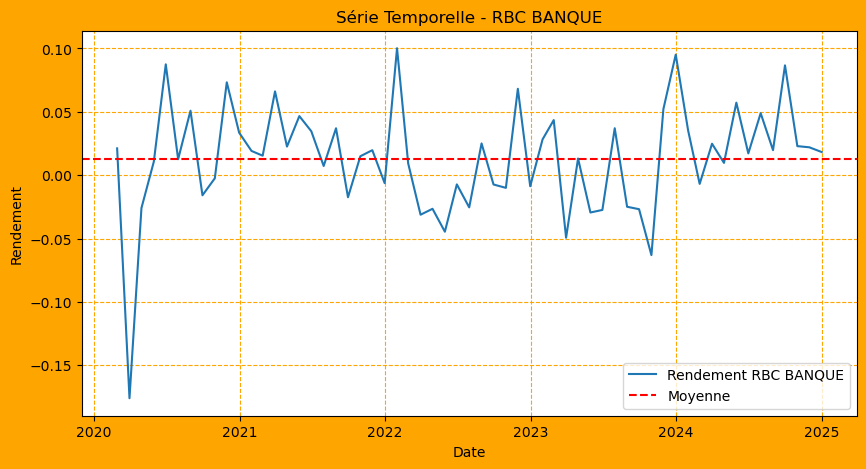

In [4]:
#Visualiser la série temporelle
plt.figure(facecolor="orange",figsize=(10, 5))
plt.plot(TableRendement, label='Rendement RBC BANQUE')
plt.axhline(TableRendement["RY.TO"].mean(),label="Moyenne",color="red",linestyle='--')
plt.title("Série Temporelle - RBC BANQUE")
plt.xlabel("Date")
plt.ylabel("Rendement")
plt.legend()
plt.grid(linestyle="--",color="orange")
plt.show()

In [5]:
#Definition du modèle ARIMA avec auto_arima
st=TableRendement #serie temporelle
modele_auto = pm.auto_arima(st,start_p=1, start_q=1,test='adf', max_p=5, max_q=5,
m=1,d=None,seasonal=False,start_P=0,D=0,trace=True,error_action='ignore',suppress_warnings=True,stepwise=True)
# Résumé du modèle ajusté par auto_arima
print(modele_auto.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-193.752, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-194.709, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-194.773, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-194.403, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-193.487, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-191.542, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-196.566, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-197.773, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-196.512, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-194.579, Time=0.10 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.608 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   59
Model:                        SARIMAX   Log Likelihood        